In [2]:
import math
import matplotlib.pyplot as plt
import pandas as pd
import thicket as th
from copy import deepcopy
from glob import glob

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

Read all files

In [3]:
tk = th.Thicket.from_caliperreader(glob("../Cali_Files/Sample/*/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 251/251 [00:04<00:00, 54.29it/s]
c:\Users\ximin\AppData\Local\Programs\Python\Python310\lib\site-packages\thicket\ensemble.py:409: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace({numerical_fill_value: None}, inplace=True)


Display Metadata and Dataframe

In [5]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.620 main
├─ 0.003 MPI_Comm_dup
├─ 0.000 MPI_Finalize
├─ 0.000 MPI_Finalized
├─ 0.000 MPI_Init
├─ 0.000 MPI_Initialized
├─ 0.002 correctness_check
│  ├─ 0.000 MPI_Bcast
│  ├─ 0.000 MPI_Recv
│  ├─ 0.000 MPI_Reduce
│  └─ 0.000 MPI_Send
├─ 0.002 data_init_runtime
└─ 0.077 sort_runtime
   ├─ 0.000 MPI_Barrier
   ├─ 0.051 comm
   │  ├─ 0.008 comm_bcast_pivots
   │  │  └─ 0.008 MPI_Bcast
   │  ├─ 0.042 comm_exchange_buckets
   │  │  ├─ 0.002 MPI_Gather
   │  │  └─ 0.039 MPI_Gatherv
   │  └─ 0.001 comm_gather_sample
   │     └─ 0.001 MPI_Gather
   └─ 0.026 comp
      ├─ 0.000 comp_determine_pivots
      ├─ 0.011 comp_local_to_buckets
      ├─ 0.000 comp_sampling_local
      └─ 0.014 comp_sort_recv_buf

Legend (Metric: Avg time/rank Min: 0.00 Max: 1.62 indices: {'profile': 21102363})
█ 1.46 - 1.62
█ 1.13 - 1.

In [6]:
tk.metadata.head(5)

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21102363,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./Cali_Files/Sample/reverse/sample-reverse-p64...,true,true,true,true,1729397148,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 22, reverse, sample]",c,sample,mpi,unsigned int,4,4194304,reverse,64,strong,25,handwritten
67513188,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./Cali_Files/Sample/random/sample-random-p2-a1...,true,true,true,true,1729287566,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16, random, sample]",c,sample,mpi,unsigned int,4,65536,random,2,strong,25,handwritten
77287775,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./Cali_Files/Sample/sorted/sample-sorted-p512-...,true,true,true,true,1729394286,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 18, sorted, sample]",c,sample,mpi,unsigned int,4,262144,sorted,512,strong,25,handwritten
83652952,2.11.0,128,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./Cali_Files/Sample/perturbed/sample-perturbed...,true,true,true,true,1729396867,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 18, perturbed, sample]",c,sample,mpi,unsigned int,4,262144,perturbed,128,strong,25,handwritten
98835146,2.11.0,4,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,./Cali_Files/Sample/perturbed/sample-perturbed...,true,true,true,true,1729289195,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./main, 16, perturbed, sample]",c,sample,mpi,unsigned int,4,65536,perturbed,4,strong,25,handwritten


In [7]:
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")
tk.metadata_column_to_perfdata("num_procs")
tk.dataframe = tk.dataframe.reset_index().set_index(["node", "input_size", "input_type", "num_procs"]).sort_index()

In [8]:
tk.dataframe.head(5)

profile  \
node                                 input_size input_type num_procs               
{'name': 'main', 'type': 'function'} 65536      perturbed  2          1825800793   
                                                           4            98835146   
                                                           8          4056801478   
                                                           16          697912589   
                                                           32         1813894685   

                                                                      nid  \
node                                 input_size input_type num_procs        
{'name': 'main', 'type': 'function'} 65536      perturbed  2          1.0   
                                                           4          1.0   
                                                           8          1.0   
                                                           16         1.0   
                                                           32         1.0   

                                                                       spot.channel  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2          regionprofile   
                                                           4          regionprofile   
                                                           8          regionprofile   
                                                           16         regionprofile   
                                                           32         regionprofile   

                                                                      Min time/rank  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2               0.414846   
                                                           4               0.435415   
                                                           8               0.655131   
                                                           16              1.121479   
                                                           32              1.595232   

                                                                      Max time/rank  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2               0.414850   
                                                           4               0.435444   
                                                           8               0.655165   
                                                           16              1.121598   
                                                           32              1.604094   

                                                                      Avg time/rank  \
node                                 input_size input_type num_procs                  
{'name': 'main', 'type': 'function'} 65536      perturbed  2               0.414848   
                                                           4               0.435432   
                                                           8               0.655154   
                                                           16              1.121575   
                                                           32              1.600980   

                                                                      Total time  \
node                                 input_size input_type num_procs               
{'name': 'main', 'type': 'function'} 65536      perturbed  2            0.829696   
                                                           4            1.741726   
                                                           8            5.241234   
                                                           16          17.945204   


Strong Scaling Plot

In [9]:
plt.rcParams.update({"font.size": 20})
def plot_mpl(pd_series, colors, markers, title, xlabel, ylabel, output_file_path):
    # convert to data_frame
    data_frame = pd_series.unstack(level="num_procs")
    line_names = data_frame.index.to_list()
    # configure plot
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1, 1, 1)
    # plot lines
    data_sets = []
    x_values = data_frame.keys().tolist()
    y_values = data_frame.values.tolist() # 2D array where each row represent a line
    for i in range(len(line_names)):
        s = ax.scatter(x_values, y_values[i], c=colors[i], marker=markers[i], s=256, alpha=0.75) # plot points
        ax.plot(x_values, y_values[i], c=colors[i]) # plot line
        data_sets.append(s)
    # configure legends, title, and labels
    ax.legend(tuple(data_sets), tuple(line_names))
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    # output
    fig.savefig(output_file_path)
    plt.show()
    return fig, ax    

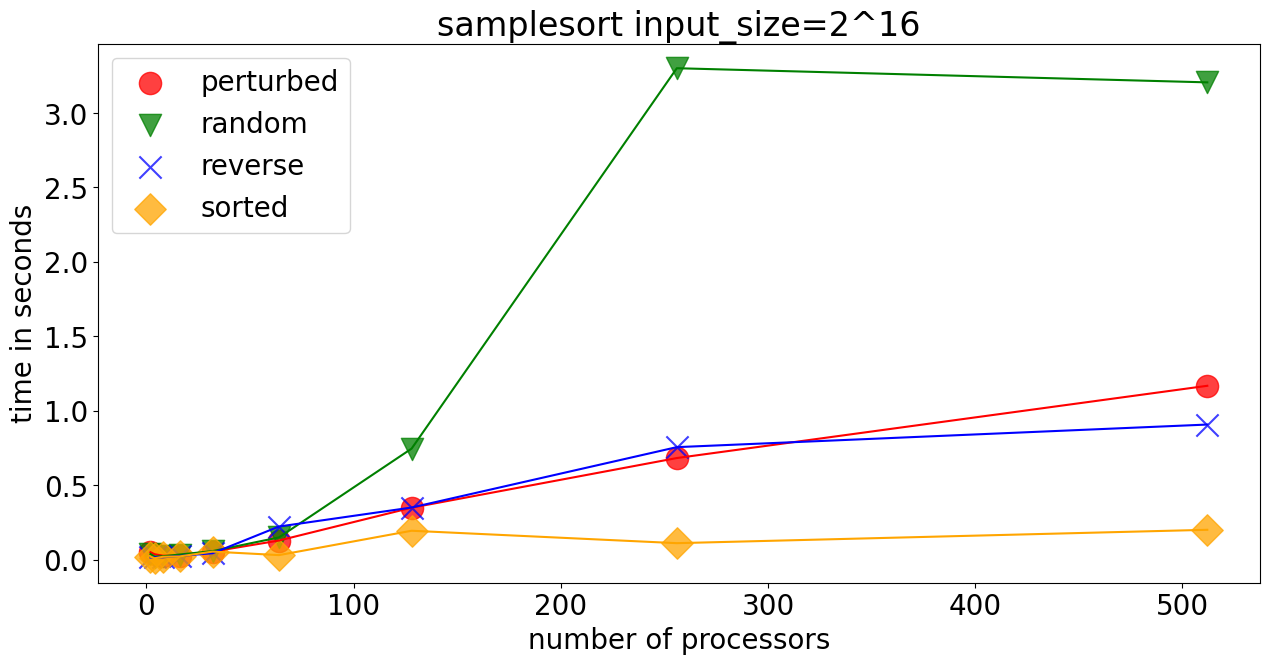

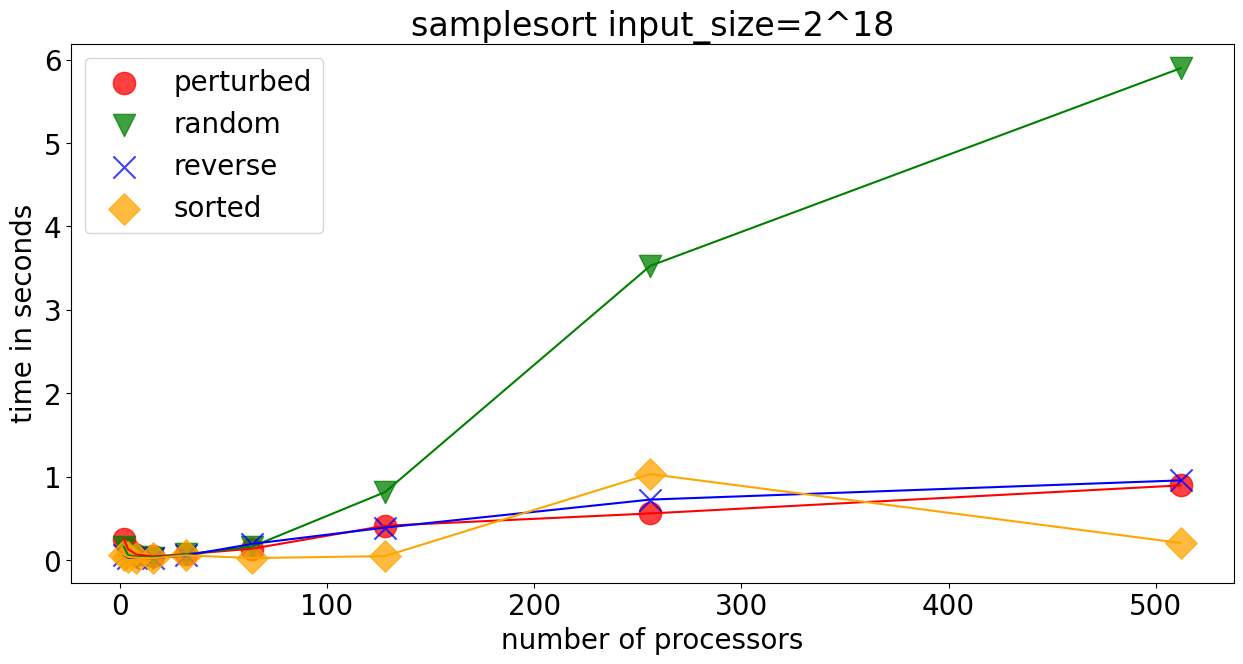

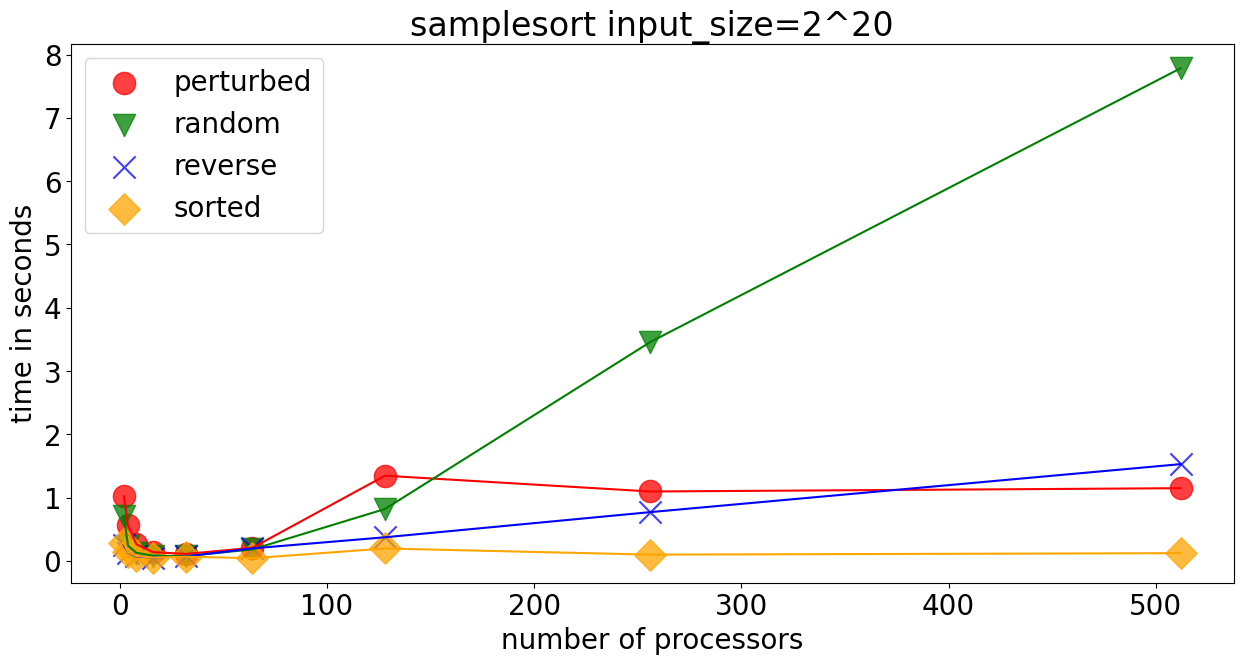

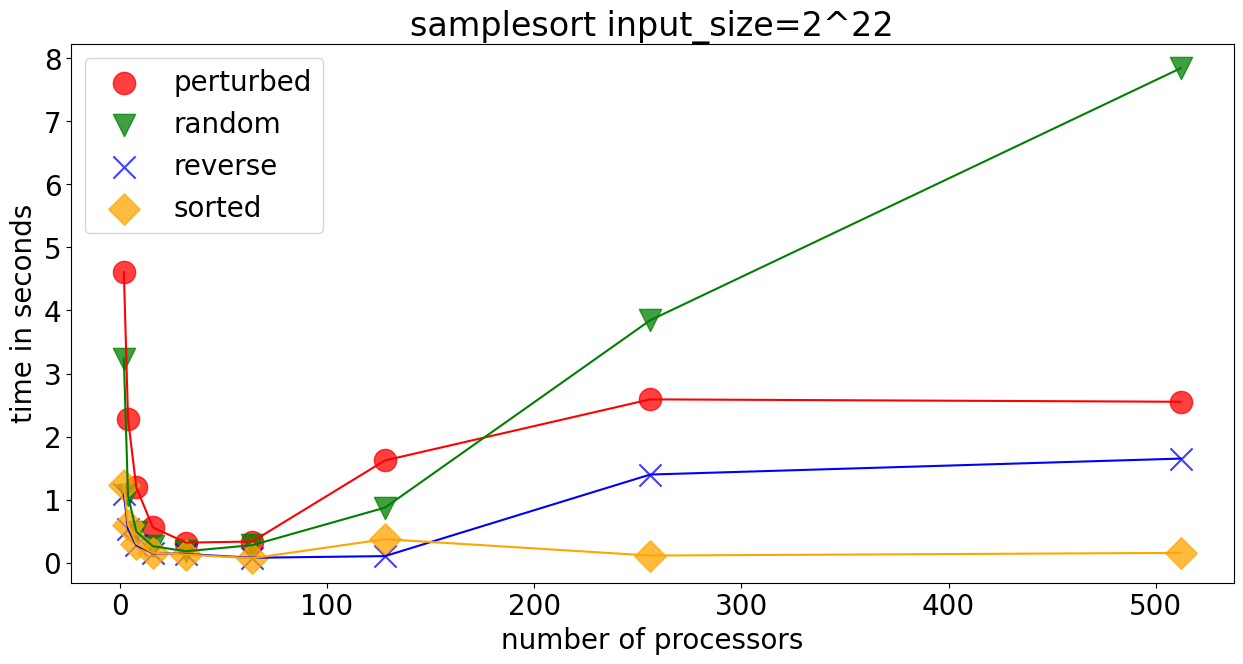

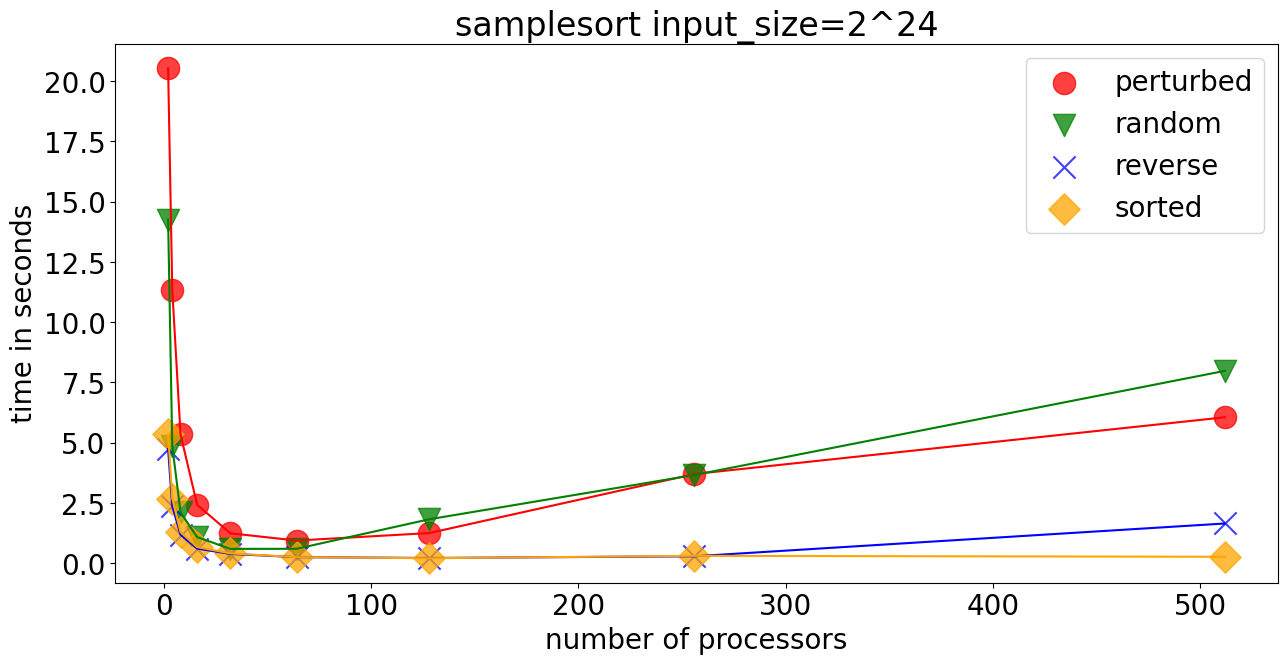

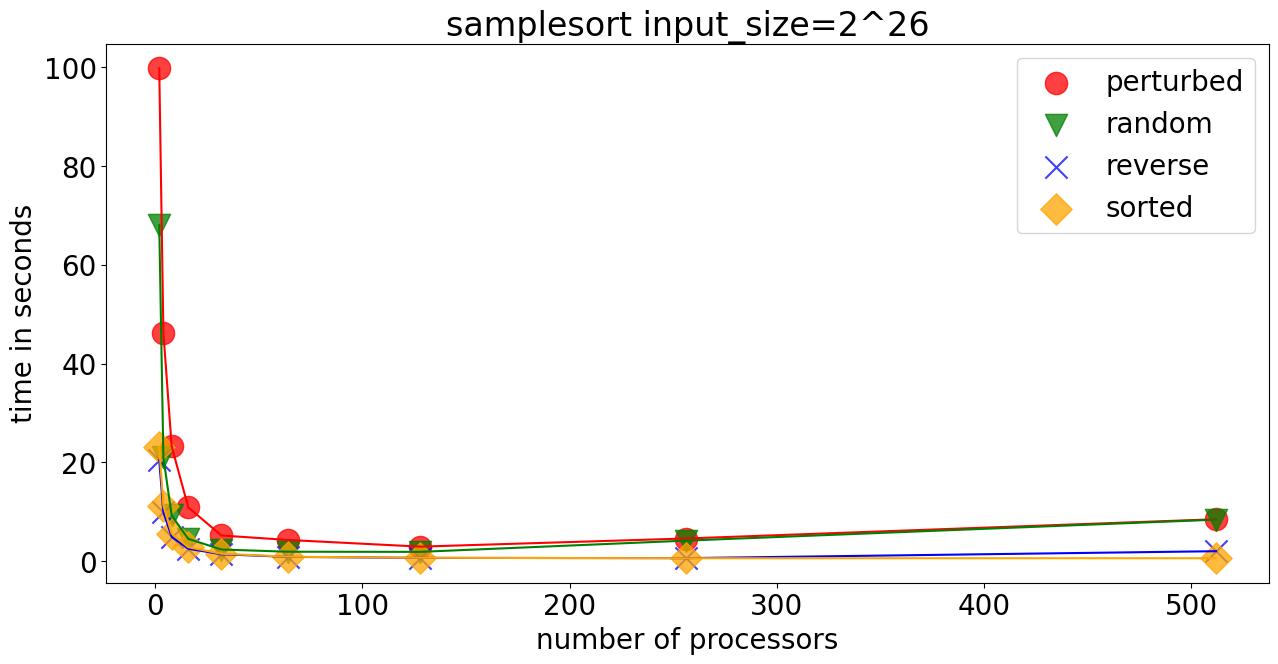

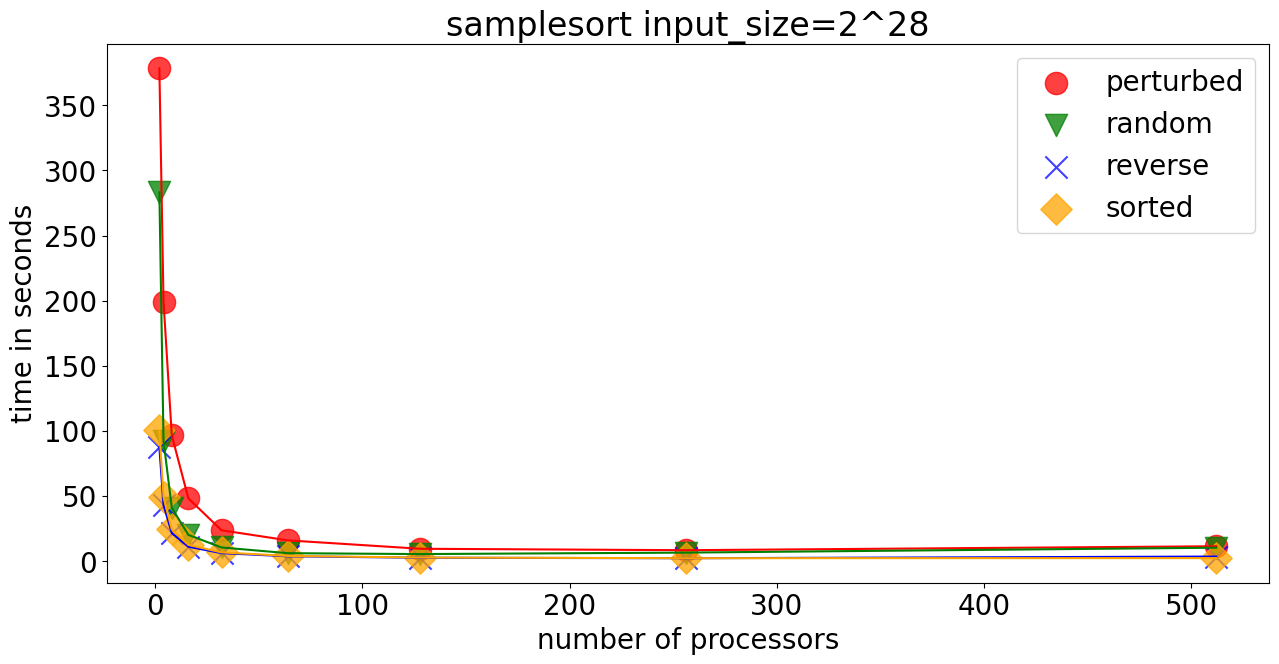

In [11]:
for node in tk.graph.traverse():
    node_name = node.frame["name"]
    if (node_name == "sort_runtime"):
        input_size_frame = tk.dataframe.loc[node, "Avg time/rank"].unstack("input_size")
        for input_size in input_size_frame.keys():
            data_series = input_size_frame[input_size]
            plot_mpl(data_series, 
                ["red", "green", "blue", "orange"], ['o', 'v', 'x', 'D'], 
                "samplesort input_size=2^{}".format(int(math.log2(input_size))), "number of processors", "time in seconds",
                "../Plots/Samplesort_Plots/samplesort-strong-{}.png".format(int(math.log2(input_size)))
            )